# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f'{city_url}').json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lon"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pan de azucar
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | strathmore
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | meadow lakes
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | abu zabad
Processing Record 8 of Set 1 | altamira
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | altai
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | shima
Processing Record 13 of Set 1 | la rinconada
Processing Record 14 of Set 1 | kuzovatovo
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | holualoa
Processing Record 17 of Set 1 | holmsund
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | eraan
Processing Record 20 of Set 1 | morales
Processing Record 21 of Set 1 | newman
Processing Record 22 of Set 1 | jaisalmer
Processing Record 23 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df["Max Temp (C)"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
0,pan de azucar,-55.2333,-34.8000,297.46,91,0,3.60,UY,1707636203,24.31
1,chonchi,-73.8092,-42.6128,285.44,97,100,1.01,CL,1707636203,12.29
2,strathmore,-113.3852,51.0501,275.82,74,68,3.09,CA,1707635678,2.67
3,bredasdorp,20.0403,-34.5322,294.96,50,0,7.07,ZA,1707636204,21.81
4,meadow lakes,-149.6011,61.6247,274.14,91,100,2.57,US,1707636204,0.99


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,pan de azucar,-55.2333,-34.8000,297.46,91,0,3.60,UY,1707636203,24.31
1,chonchi,-73.8092,-42.6128,285.44,97,100,1.01,CL,1707636203,12.29
2,strathmore,-113.3852,51.0501,275.82,74,68,3.09,CA,1707635678,2.67
3,bredasdorp,20.0403,-34.5322,294.96,50,0,7.07,ZA,1707636204,21.81
4,meadow lakes,-149.6011,61.6247,274.14,91,100,2.57,US,1707636204,0.99


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

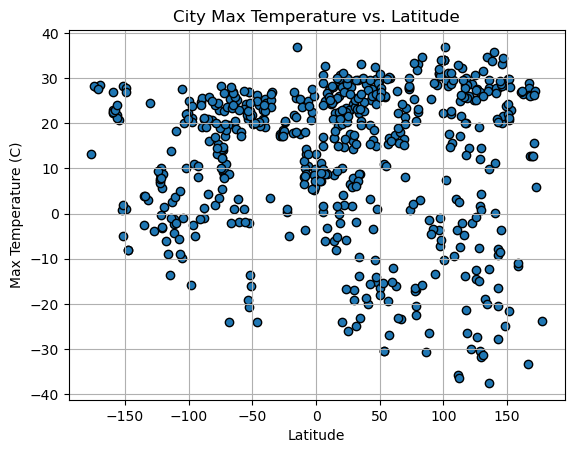

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temperature vs. Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

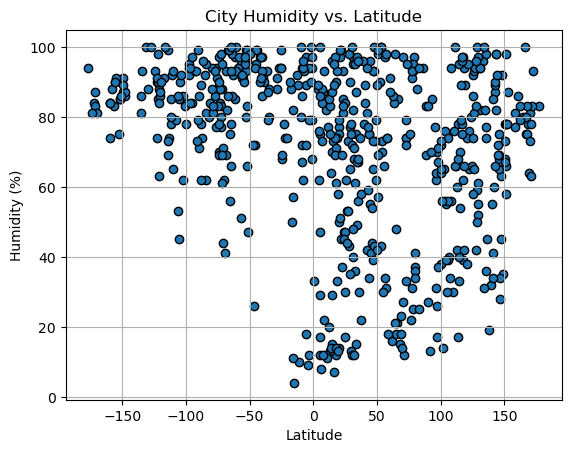

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs. Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

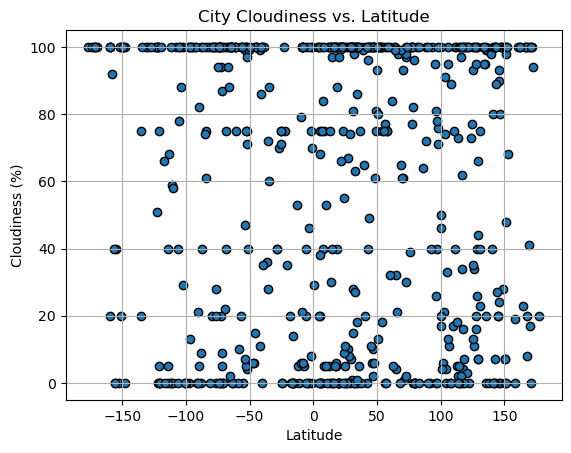

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness vs. Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

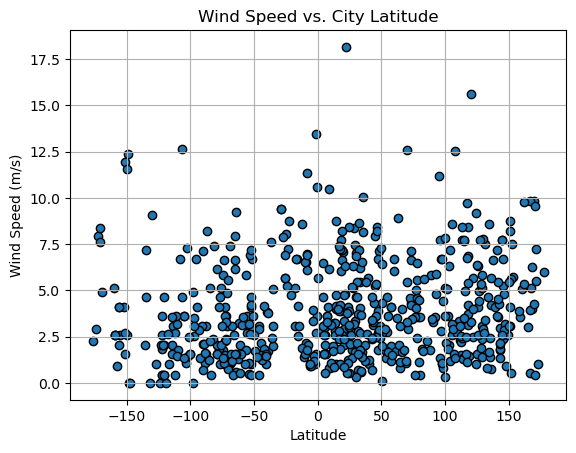

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. City Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, r_value, p_value, stderr) = linregress(x,y)
    line = (slope * x) + intercept
    plt.plot(x, line, color="red")
    print(f'The r-value is: {r_value}')
    return(slope, intercept, r_value)

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
3,bredasdorp,20.0403,-34.5322,294.96,50,0,7.07,ZA,1707636204,21.81
6,abu zabad,29.2500,12.3500,297.45,13,7,7.46,SD,1707636205,24.30
9,altai,96.2583,46.3722,269.55,62,0,7.70,MN,1707636206,-3.60
11,shima,117.8111,24.4478,293.16,39,4,3.11,CN,1707636206,20.01
13,kuzovatovo,47.6866,53.5468,258.05,93,100,1.77,RU,1707636207,-15.10


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,pan de azucar,-55.2333,-34.8000,297.46,91,0,3.60,UY,1707636203,24.31
1,chonchi,-73.8092,-42.6128,285.44,97,100,1.01,CL,1707636203,12.29
2,strathmore,-113.3852,51.0501,275.82,74,68,3.09,CA,1707635678,2.67
4,meadow lakes,-149.6011,61.6247,274.14,91,100,2.57,US,1707636204,0.99
5,bethel,-73.4140,41.3712,282.39,84,0,1.54,US,1707636205,9.24


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.04613032161492826


Text(0, -40, 'y = -0.02x + 13.91')

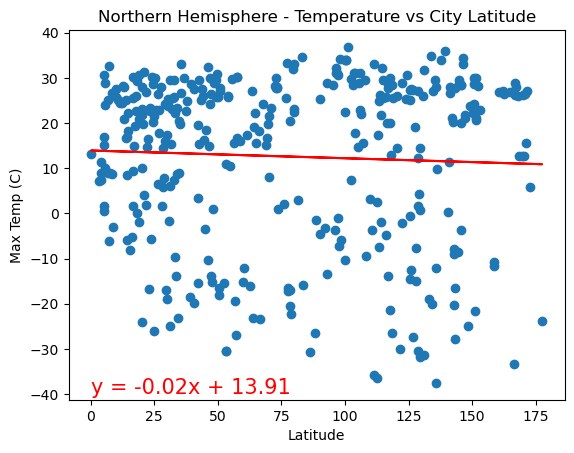

In [53]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp (C)"]
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Northern Hemisphere - Temperature vs City Latitude")
linear_regression(x,y)
(slope, intercept, r_value, p_value, stderr) = linregress(x,y)
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (0,-40),fontsize=15,color="red")

The r-value is: 0.12626130658624116


Text(-175, 5, 'y = 0.03x + 16.23')

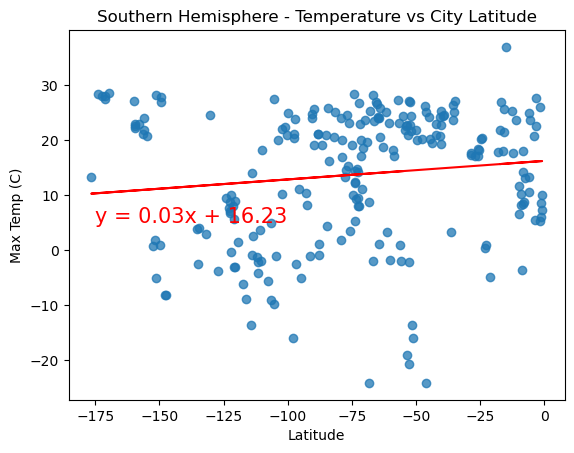

In [58]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp (C)"]
plt.scatter(x, y, alpha= .75)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Southern Hemisphere - Temperature vs City Latitude")
linear_regression(x,y)
(slope, intercept, r_value, p_value, stderr) = linregress(x,y)
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (-175, 5),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15473010539486706


Text(100, 5, 'y = 0.08x + 58.45')

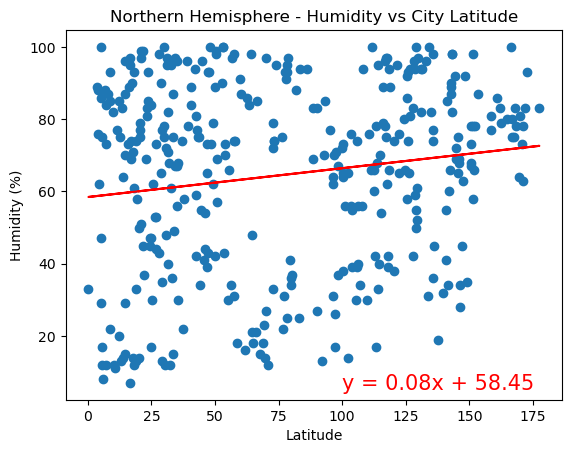

In [66]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs City Latitude")
linear_regression(x,y)
(slope, intercept, r_value, p_value, stderr) = linregress(x,y)
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (100,5),fontsize=15,color="red")

The r-value is: -0.16075199018138903


Text(-175, 40, 'y = -0.06x + 78.13')

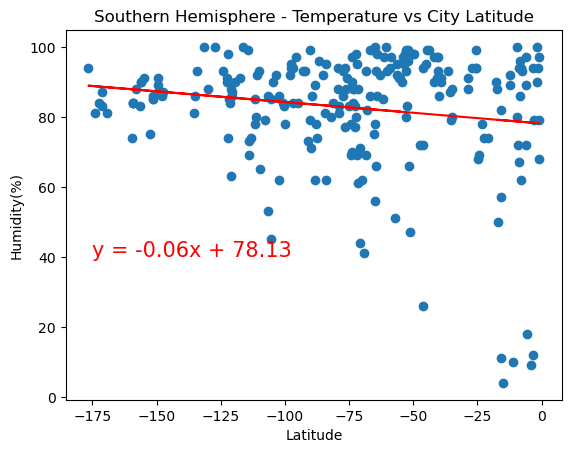

In [70]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere - Temperature vs City Latitude")
linear_regression(x,y)
(slope, intercept, r_value, p_value, stderr) = linregress(x,y)
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (-175, 40),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


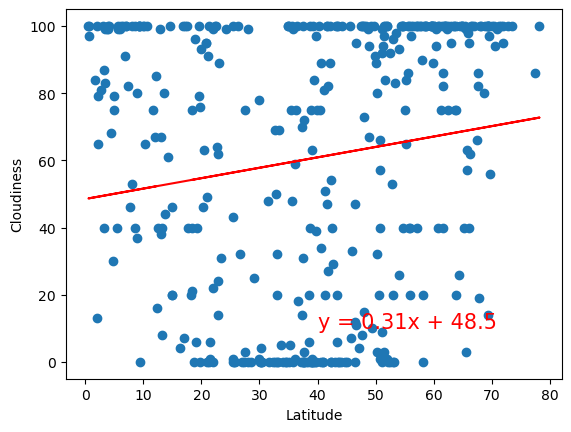

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


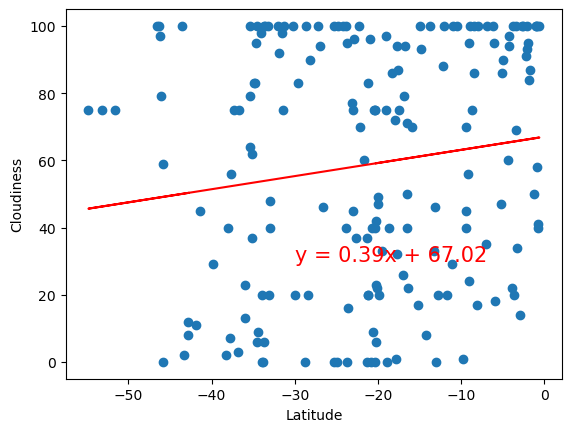

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


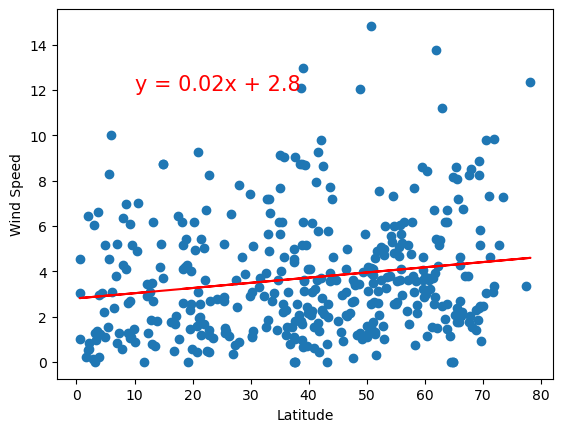

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


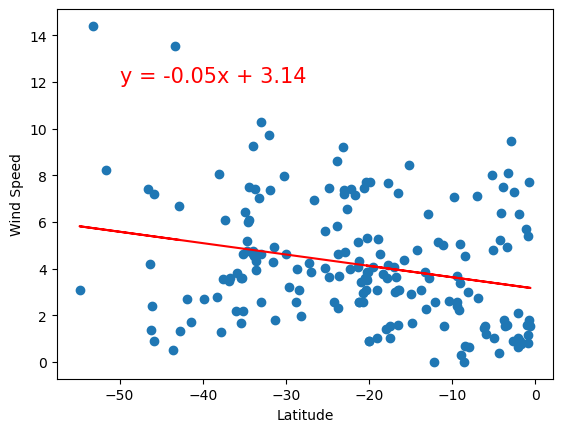

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE